# WeatherPy

This WeatherPy code collects API data from a random selection of 500 or more cities around the globe.
The data from those cities is plotted to determine if there is a correlation between the latitude and weather.

In [90]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress
import datetime as dt

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Get today's date to add to plot titles
date = dt.datetime.now()
date = date.strftime("%m/%d/%Y")

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [54]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=10)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=10)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

10

In [55]:
#Stuff needed for csv read/write
#  # Store filepath in a variable
# file_one = "Resources/DataOne.csv"
#  # Read our Data file with the pandas library
# # Not every CSV requires an encoding, but be aware this can come up
# file_one_df = pd.read_csv(file_one, encoding="ISO-8859-1")
#  # Show mulitple specific columns--note the extra brackets
# file_one_df[["first_name", "email"]].head()
#  # Export file as a CSV, without the Pandas index, but with the header
# file_one_df.to_csv("Output/fileOne.csv", encoding="utf-8", index=False, header=True)

### Perform API Calls

In [65]:
# Base URL from the OpenWeatherMap API
url = "http://api.openweathermap.org/data/2.5/weather?"

# Create the query URL
query_url = f"{url}appid={weather_api_key}&units=imperial&q="

#Create lists to store the data
city_name= []
city_id = []
lat = []
temp = []
humid = []
clouds = []
wind = []

#Running a query to get the weather data for each city in the cites list
print("Beginning Data Retrieval\n----------------------")
for city in cities:
    try:
        query = query_url + city  
        city_data = requests.get(query).json()
        #Print out each city and its ID as it is being processed
        id_number = city_data['id']
        #print(json.dumps(city_data, indent=4))
        print('''Processing...City Name: {0} 
             City ID: {1}'''.format(city, id_number))    
        #Each element of data is being appended to a coorsponding list as it is processed
        city_name.append(city_data['name'])
        city_id.append(city_data['id'])
        lat.append(city_data['coord']['lat'])
        temp.append(city_data['main']['temp'])
        humid.append(city_data['main']['humidity'])
        clouds.append(city_data['clouds']['all'])
        wind.append(city_data['wind']['speed'])  
    # If the city is not found in OpenWeatherMap, skip it
    except:
        print("City not found. Skipping...")
        pass
print("----------------------\nData Retrieval Complete\n----------------------")
       

Beginning Data Retrieval
----------------------
Processing...City Name: pinotepa nacional 
             City ID: 3516926
Processing...City Name: saint george 
             City ID: 5546220
Processing...City Name: college 
             City ID: 5859699
Processing...City Name: khatanga 
             City ID: 2022572
Processing...City Name: nanortalik 
             City ID: 3421765
Processing...City Name: yellowknife 
             City ID: 6185377
Processing...City Name: rikitea 
             City ID: 4030556
Processing...City Name: new norfolk 
             City ID: 2155415
Processing...City Name: katobu 
             City ID: 1640972
Processing...City Name: butaritari 
             City ID: 2110227
----------------------
Data Retrieval Complete
----------------------
[85.69, 102.76, 57.04, 54.72, 47.3, 72.9, 72.25, 38.44, 72.66, 80.28]
[16.32, 37.1, 64.86, 71.97, 60.14, 62.46, -23.12, -42.78, -4.94, 3.07]


### Convert Raw Data to DataFrame

In [67]:
#Creating a dictionary of the weather stats for ecach city
weather_dict = {"City Name": city_name,
                "City ID": city_id, 
                "Latitude": lat, 
                "Temp(F)": temp,
                "Humidity(%)": humid,
                "Cloudiness(%)": clouds,
                "Wind Speed(mph)": wind}

#Making a dataframe table of the dictionary data
weather_data = pd.DataFrame(weather_dict) 

#Exporting the data to a csv file without the Pandas index, but with the header
weather_data.to_csv("out_put/weather_data.csv", encoding="utf-8", index=False, header=True)
weather_data.head(10)

,City Name,City ID,Latitude,Temp(F),Humidity(%),Cloudiness(%),Wind Speed(mph)
0,Pinotepa Nacional,3516926,16.32,85.69,68,94,7.43
1,Saint George,5546220,37.10,102.76,14,1,6.93
2,College,5859699,64.86,57.04,63,90,8.05
3,Khatanga,2022572,71.97,54.72,62,0,3.31
4,Nanortalik,3421765,60.14,47.30,93,100,9.17
5,Yellowknife,6185377,62.46,72.90,43,40,10.29
6,Rikitea,4030556,-23.12,72.25,76,95,18.43
7,New Norfolk,2155415,-42.78,38.44,92,100,2.68
8,Katobu,1640972,-4.94,72.66,86,85,2.75
9,Butaritari,2110227,3.07,80.28,85,100,10.45


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [112]:
too_humid = weather_data["Humidity(%)"] > 100
for value in too_humid:
    if value == "True":
        print("One or more cites is over 100% humidity.")
 

In [ ]:
#  Get the indices of cities that have humidity over 100%.

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

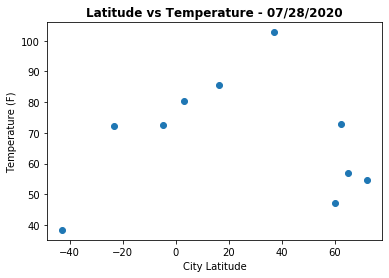

The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.
The data from those cities is plotted to determine if there is a correlation between the latitude and temperature.


In [104]:
# Plot the latitude of the city compared to its temperature
city_lat = weather_data['Latitude']
temp = weather_data['Temp(F)']
plt.scatter(city_lat, temp)
plt.xlabel('City Latitude')
plt.ylabel('Temperature (F)')
plt.title(f'Latitude vs Temperature - {date}', fontweight="black")
plt.show()
print(f'The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.\nThe data from those cities is plotted to determine if there is a correlation between the latitude and temperature.')


## Latitude vs. Humidity Plot

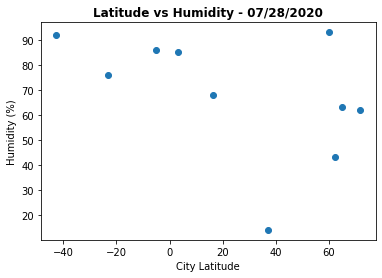

The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.
The data from those cities is plotted to determine if there is a correlation between the latitude and humidity.


In [105]:
# Plot the latitude of the city compared to its humidity
city_lat = weather_data['Latitude']
humidity = weather_data['Humidity(%)']
plt.scatter(city_lat, humidity)
plt.xlabel('City Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Latitude vs Humidity - {date}', fontweight="black")
plt.show()
print(f'The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.\nThe data from those cities is plotted to determine if there is a correlation between the latitude and humidity.')


## Latitude vs. Cloudiness Plot

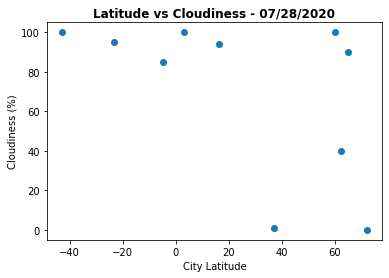

The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.
The data from those cities is plotted to determine if there is a correlation between the latitude and cloudiness.


In [106]:
# Plot the latitude of the city compared to its cloudiness
city_lat = weather_data['Latitude']
clouds = weather_data['Cloudiness(%)']
plt.scatter(city_lat, clouds)
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Latitude vs Cloudiness - {date}', fontweight="black")
plt.show()
print(f'The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.\nThe data from those cities is plotted to determine if there is a correlation between the latitude and cloudiness.')


## Latitude vs. Wind Speed Plot

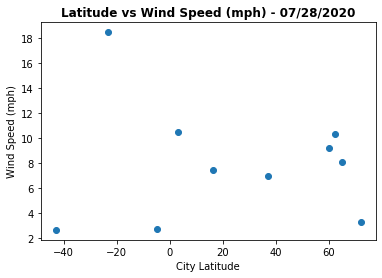

The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.
The data from those cities is plotted to determine if there is a correlation between the latitude and wind speed.


In [113]:
# Plot the latitude of the city compared to its wind speed
city_lat = weather_data['Latitude']
wind = weather_data['Wind Speed(mph)']
plt.scatter(city_lat, wind)
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Latitude vs Wind Speed (mph) - {date}', fontweight="black")
plt.show()
print(f'The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.\nThe data from those cities is plotted to determine if there is a correlation between the latitude and wind speed.')


## Linear Regression

In [118]:
# If the city latitude is greater than zero it is in the northern hemisphere
northern_data = weather_data.loc[weather_data['Latitude'] > 0]
# If the city latitude is less than zero it is in the southern hemisphere
southern_data = weather_data.loc[weather_data['Latitude'] < 0]

In [151]:
#This function creates and plots a liner regression line and equation, and returns the r-squared value
def linear_regression(city_lat, weather):
    x_values = city_lat
    y_values = weather
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(30, 20), fontsize=15,color="red")
    return print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Temp vs. Latitude Linear Regression

The r-squared is: 0.4411299342282906


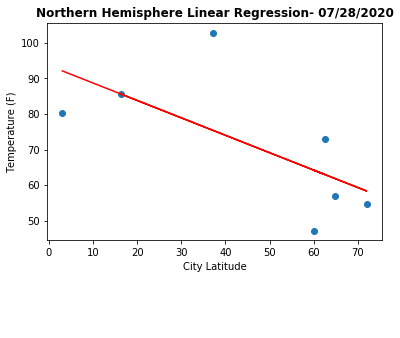

In [152]:
# Plot the latitude of the city compared to its temperature
city_lat = northern_data['Latitude']
temp = northern_data['Temp(F)']
plt.scatter(city_lat, temp)
plt.xlabel('City Latitude')
plt.ylabel('Temperature (F)')
plt.title(f'Northern Hemisphere Linear Regression- {date}', fontweight="black")
#Passing in weather data and city latitude to the funtion that creates the linear regression 
linear_regression(city_lat, temp)
plt.show()
#print(f'The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.\nThe data from those cities is plotted to determine if there is a correlation between the latitude and temperature.')

####  Southern Hemisphere - Temp vs. Latitude Linear Regression

The r-squared is: 0.7780269071071106


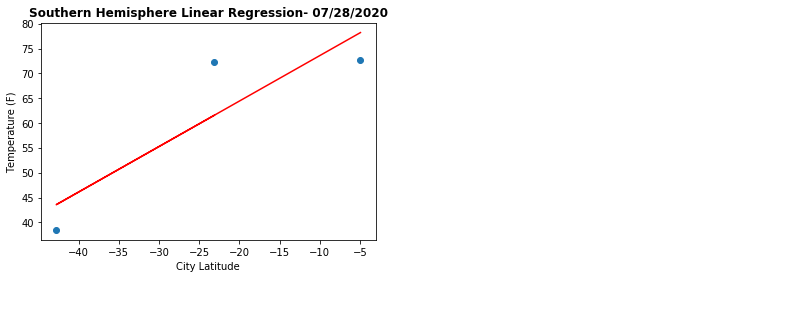

In [153]:
# Plot the latitude of the city compared to its temperature
city_lat = southern_data['Latitude']
temp = southern_data['Temp(F)']
plt.scatter(city_lat, temp)
plt.xlabel('City Latitude')
plt.ylabel('Temperature (F)')
plt.title(f'Southern Hemisphere Linear Regression- {date}', fontweight="black")
#Passing in weather data and city latitude to the funtion that creates the linear regression 
linear_regression(city_lat, temp)
plt.show()
#print(f'The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.\nThe data from those cities is plotted to determine if there is a correlation between the latitude and temperature.')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.019936388887193374


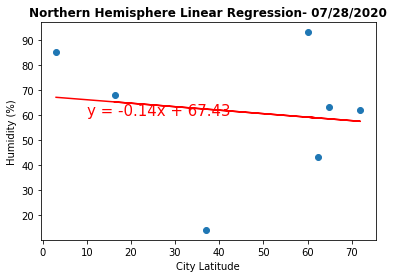

The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.
The data from those cities is plotted to determine if there is a correlation between the latitude and humidity.


In [134]:
# Plot the latitude of the city compared to its humidity
city_lat = northern_data['Latitude']
humidity = northern_data['Humidity(%)']
plt.scatter(city_lat, humidity)
plt.xlabel('City Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Northern Hemisphere Linear Regression- {date}', fontweight="black")
#Passing in weather data and city latitude to the funtion that creates the linear regression 
linear_regression(city_lat, humidity)
plt.show()
print(f'The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.\nThe data from those cities is plotted to determine if there is a correlation between the latitude and humidity.')

#Passing in weather data and city latitude to the funtion that creates the linear regression 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1536814107501646


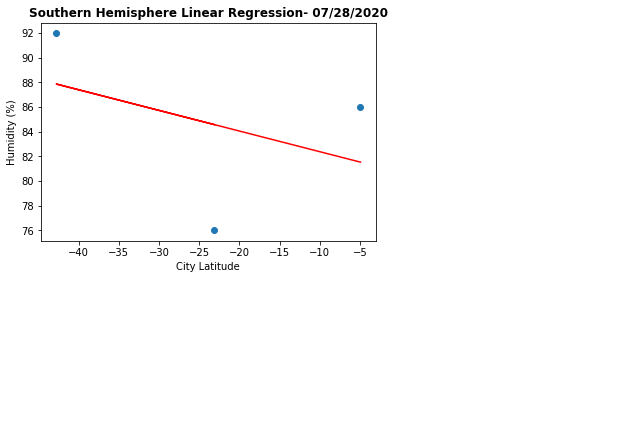

The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.
The data from those cities is plotted to determine if there is a correlation between the latitude and humidity.


In [137]:
# Plot the latitude of the city compared to its humidity
city_lat = southern_data['Latitude']
humidity = southern_data['Humidity(%)']
plt.scatter(city_lat, humidity)
plt.xlabel('City Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Southern Hemisphere Linear Regression- {date}', fontweight="black")
#Passing in weather data and city latitude to the funtion that creates the linear regression 
linear_regression(city_lat, humidity)
plt.show()
print(f'The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.\nThe data from those cities is plotted to determine if there is a correlation between the latitude and humidity.')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1592924977524749


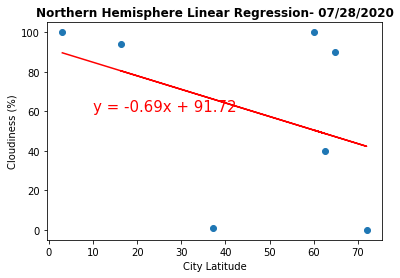

The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.
The data from those cities is plotted to determine if there is a correlation between the latitude and cloudiness.


In [138]:
# Plot the latitude of the city compared to its cloudiness
city_lat = northern_data['Latitude']
clouds = northern_data['Cloudiness(%)']
plt.scatter(city_lat, clouds)
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Northern Hemisphere Linear Regression- {date}', fontweight="black")
#Passing in weather data and city latitude to the funtion that creates the linear regression 
linear_regression(city_lat, clouds)
plt.show()
print(f'The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.\nThe data from those cities is plotted to determine if there is a correlation between the latitude and cloudiness.')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.9554355785693626


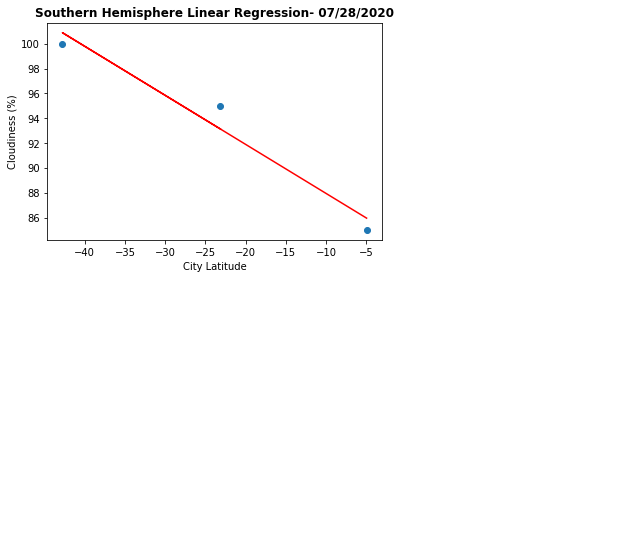

The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.
The data from those cities is plotted to determine if there is a correlation between the latitude and cloudiness.


In [139]:
# Plot the latitude of the city compared to its cloudiness
city_lat = southern_data['Latitude']
clouds = southern_data['Cloudiness(%)']
plt.scatter(city_lat, clouds)
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Southern Hemisphere Linear Regression- {date}', fontweight="black")
#Passing in weather data and city latitude to the funtion that creates the linear regression 
linear_regression(city_lat, clouds)
plt.show()
print(f'The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.\nThe data from those cities is plotted to determine if there is a correlation between the latitude and cloudiness.')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.006304872224507967


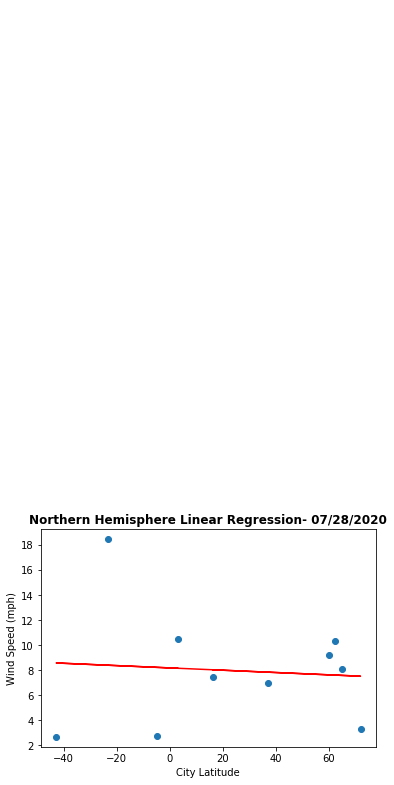

The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.
The data from those cities is plotted to determine if there is a correlation between the latitude and wind speed.


In [132]:
# Plot the latitude of the city compared to its wind speed
city_lat = weather_data['Latitude']
wind = weather_data['Wind Speed(mph)']
plt.scatter(city_lat, wind)
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Northern Hemisphere Linear Regression- {date}', fontweight="black")
#Passing in weather data and city latitude to the funtion that creates the linear regression 
linear_regression(city_lat, wind)
plt.show()
print(f'The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.\nThe data from those cities is plotted to determine if there is a correlation between the latitude and wind speed.')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0006986502159432267


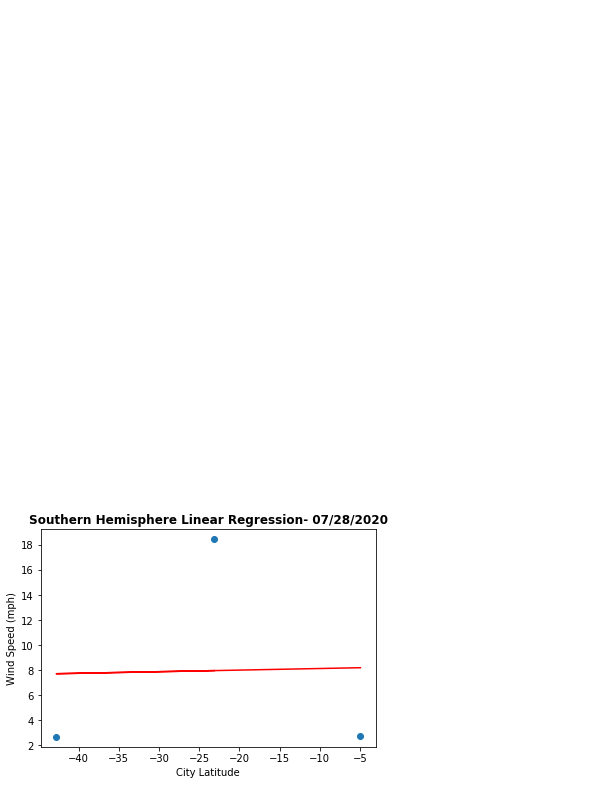

The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.
The data from those cities is plotted to determine if there is a correlation between the latitude and wind speed.


In [140]:
# Plot the latitude of the city compared to its wind speed
city_lat = southern_data['Latitude']
wind = southern_data['Wind Speed(mph)']
plt.scatter(city_lat, wind)
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Southern Hemisphere Linear Regression- {date}', fontweight="black")
#Passing in weather data and city latitude to the funtion that creates the linear regression 
linear_regression(city_lat, wind)
plt.show()
print(f'The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.\nThe data from those cities is plotted to determine if there is a correlation between the latitude and wind speed.')